In [1]:
import pandas as pd

import seaborn as sns
#import matplotlib.pylab as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_excel("c:/testData.xlsx")
pd.options.display.max_columns = None
# display all DataFrame columns to check with my own eyes

data.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
               'avgCheck', 'sojuP']
# change column names to index easily

data.head()

barId       date       segment  draughtV  packagedV  totalV  totalR  \
0  Bar 1 2017-07-01  Food,Spirits       9.3       6.16   15.46  887100   
1  Bar 1 2017-07-02  Food,Spirits      21.3       2.50   23.80  745800   
2  Bar 1 2017-07-03  Food,Spirits       9.3       2.50   11.80  575100   
3  Bar 1 2017-07-04  Food,Spirits      15.9       7.50   23.40  553500   
4  Bar 1 2017-07-05  Food,Spirits       1.7       8.00    9.70  256600   

    beerR  beerU  spiritsR  spiritsU   foodR  nonAlcoholR  wineR  sojuR  \
0  124500     22    278000        68  461100        23500      0  54000   
1  167500     16    256000        63  298300        24000      0  18000   
2   87000     12    237000        57  234100        10000      0  27000   
3  178000     26    146000        35  222500         4000      0  27000   
4   84000     17     80500        20   92100            0      0   4500   

   sojuU  beerO  beerFoodO  sojuBeerO  sojuFoodO      avgCheck   sojuP  
0     12     14         14          1          7  26881.818182  4500.0  
1      4      7          7          1          2  46612.500000  4500.0  
2      5      7          7          2          4  26140.909091  5625.0  
3      5     12         12          2          4  34593.750000  5625.0  
4      1      7          7          1          1  28511.111111  4500.0

### variable selection

In [59]:
test_set = data[['barId', 'date', 'draughtV', 'packagedV', 'totalR', 'beerU',
                 'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuU', 'beerO']]
# for segmentation only
test_set = test_set.groupby('barId', as_index=False).mean()
test_set.head()

barId   draughtV  packagedV        totalR       beerU   spiritsU  \
0    Bar 1  15.853285  10.282628  1.115376e+06   40.854015  90.912409   
1   Bar 10  20.902222   3.758128  4.364050e+05   63.977778   5.072222   
2  Bar 100  20.261261   2.744054  3.280270e+05   45.414414   6.990991   
3  Bar 101   4.188333   4.689167  1.877052e+06  137.217949   7.987179   
4  Bar 102  22.316154   7.324188  2.777787e+06  155.239316  25.495726   

           foodR   nonAlcoholR  wineR      sojuU      beerO  
0  478606.197080  30362.598540    0.0  43.357664  16.583942  
1  129551.111111   4877.777778    0.0   4.772222  17.183333  
2  136504.504505   1792.792793    0.0   6.747748  10.576577  
3  626038.461538  16794.871795    0.0   0.000000  26.205128  
4  871358.974359  24760.683761    0.0  15.008547  31.290598

In [33]:
# kmeans separates distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [25]:
def scaling(column):
    tmp = StandardScaler()
    tmp.fit(np.array(column).reshape(-1,1))
    return pd.DataFrame(tmp.transform(np.array(column).reshape(-1,1)), columns=[column.name])

In [52]:
def scaling(column):
    tmp = scale(column)
    return pd.DataFrame(tmp, columns=[column.name])

In [55]:
test_set_scaled = test_set[:]
for column in test_set.iloc[:,1:].columns:
    test_set_scaled.loc[:,column] = scaling(test_set[column])

In [56]:
test_set_scaled

barId  draughtV  packagedV    totalR     beerU  spiritsU     foodR  \
0      Bar 1 -0.237163   0.876999 -0.109887 -0.322030  1.671653 -0.305667   
1     Bar 10 -0.043560  -0.284474 -0.699556  0.080949 -0.574689 -0.699932   
2    Bar 100 -0.068138  -0.464996 -0.793680 -0.242556 -0.524477 -0.692078   
3    Bar 101 -0.684460  -0.118733  0.551609  1.357311 -0.498408 -0.139139   
4    Bar 102  0.010658   0.350346  1.333873  1.671371 -0.040229  0.137956   
5    Bar 103  0.050981   0.710358  0.022076  0.039896  1.871139 -0.231948   
6    Bar 104  0.377462   0.093612  0.324209  0.218623 -0.307331  0.507344   
7    Bar 105 -0.833444  -0.597450 -0.747733 -0.956894 -0.367625 -0.504232   
8    Bar 106 -0.532978  -0.235275 -0.503588 -0.594137  0.165570 -0.430992   
9    Bar 107 -0.402115   0.423211  0.829963 -0.033107  0.783124  0.479056   
10   Bar 108 -0.763503   1.243935 -0.045746 -0.529762  1.077986 -0.045779   
11   Bar 109 -0.703665   0.211786 -0.210248 -0.692571  0.368336 -0.001117   
12    Bar 11 -0.366134  -0.443600 -0.524270 -0.329857 -0.559722 -0.520765   
13   Bar 110  0.162335  -0.281693 -0.436277 -0.162246 -0.456440 -0.443030   
14   Bar 111 -0.565727   1.348184  1.505054 -0.216001  0.868645  1.546407   
15   Bar 112 -0.279337  -0.953484 -0.583237  0.268528 -0.543868 -0.596055   
16   Bar 113 -0.555333  -0.178479  0.022872 -0.562903 -0.541125  0.157953   
17   Bar 114 -0.695938  -0.789588 -0.889427 -0.884820 -0.643310 -0.655801   
18   Bar 115 -0.578102   4.370176  0.092659  1.025696 -0.481806 -0.557136   
19   Bar 116 -0.613101  -0.505032 -0.771047 -0.680791 -0.214638 -0.620375   
20   Bar 117 -0.562237   0.258245 -0.603659 -0.542077 -0.111883 -0.496009   
21   Bar 118 -0.281909  -0.569372  0.150341 -0.504055 -0.490539  0.394790   
22   Bar 119  0.288718   0.623766 -0.058973  0.485569  0.407030 -0.228131   
23    Bar 12 -0.608397  -0.116374 -0.484796 -0.586277  0.437686 -0.470691   
24   Bar 120 -0.753897  -0.321235 -0.081096 -0.752767  0.225170  0.206270   
25   Bar 121 -0.777959  -0.859491 -0.893689 -0.952524 -0.316853 -0.694620   
26   Bar 122 -0.094903   0.484515  0.157267 -0.074418  1.368423 -0.050079   
27   Bar 123 -0.297920  -0.362936 -0.639222 -0.405933 -0.226398 -0.527380   
28   Bar 124 -0.654162  -0.789900 -0.849598 -0.859457 -0.475930 -0.644077   
29   Bar 125 -0.408623  -0.721554 -0.560208 -0.600356 -0.358732 -0.333666   
..       ...       ...        ...       ...       ...       ...       ...   
117   Bar 72 -0.775822  -0.892603 -0.750948 -0.940999 -0.668884 -0.504172   
118   Bar 73 -0.267443  -0.621999 -0.740972 -0.445253 -0.462571 -0.582436   
119   Bar 74  0.933248   0.367487  0.297679  1.183191  0.590594  0.064296   
120   Bar 75  0.706894   0.872262  0.061165  0.596466 -0.019998  0.067320   
121   Bar 76  0.751754  -0.173731 -0.341788  0.182151 -0.402683 -0.463902   
122   Bar 77 -0.619661  -0.693961 -0.444202 -0.484265 -0.456950 -0.389925   
123   Bar 78 -0.752335  -0.756171  0.181982 -0.862477 -0.610323  0.396828   
124   Bar 79  0.108948  -0.717920 -0.237585 -0.413506 -0.493873 -0.054906   
125    Bar 8 -0.565321   0.742435 -0.267672 -0.520662  0.964324 -0.242583   
126   Bar 80  1.579048   4.748485  2.193548  1.125610  5.852447  1.295135   
127   Bar 81 -0.625480  -0.238170 -0.632029 -0.736540  0.288277 -0.552281   
128   Bar 82  0.119951  -0.422450 -0.133098  0.355235 -0.053665 -0.525049   
129   Bar 83 -0.045161  -0.788093 -0.227618 -0.283559 -0.480157  0.014980   
130   Bar 84  0.538908  -0.130283 -0.087068  0.515989  0.043557 -0.223627   
131   Bar 85 -0.499251   0.304966 -0.564721 -0.346346 -0.133149 -0.491490   
132   Bar 86 -0.706061  -0.759495 -0.903216 -0.876507 -0.612925 -0.676816   
133   Bar 87 -0.723376  -0.790730 -0.797063 -0.825728 -0.377095 -0.630561   
134   Bar 88 -0.581066   0.069174 -0.758512 -0.560803 -0.447916 -0.634337   
135   Bar 89 -0.634221   0.025025 -0.856718 -0.538235 -0.511743 -0.726352   
136    Bar 9 -0.623291   0.650567 -0.021742  0.116086  0.091673 -0.376334   
137

___

In [31]:
data[data.barId=='Bar 1']

barId       date       segment  draughtV  packagedV  totalV   totalR  \
0    Bar 1 2017-07-01  Food,Spirits       9.3       6.16   15.46   887100   
1    Bar 1 2017-07-02  Food,Spirits      21.3       2.50   23.80   745800   
2    Bar 1 2017-07-03  Food,Spirits       9.3       2.50   11.80   575100   
3    Bar 1 2017-07-04  Food,Spirits      15.9       7.50   23.40   553500   
4    Bar 1 2017-07-05  Food,Spirits       1.7       8.00    9.70   256600   
5    Bar 1 2017-07-06  Food,Spirits       1.7      13.42   15.12   930200   
6    Bar 1 2017-07-07  Food,Spirits      14.4      16.12   30.52  1457400   
7    Bar 1 2017-07-08  Food,Spirits      13.5       3.50   17.00   717800   
8    Bar 1 2017-07-11  Food,Spirits       4.4       9.66   14.06   736400   
9    Bar 1 2017-07-12  Food,Spirits       3.2       3.00    6.20   287400   
10   Bar 1 2017-07-13  Food,Spirits      16.7       9.00   25.70   896700   
11   Bar 1 2017-07-14  Food,Spirits      16.1       8.66   24.76  1129000   
12   Bar 1 2017-07-15  Food,Spirits       6.9      10.66   17.56   938000   
13   Bar 1 2017-07-16  Food,Spirits       4.4       3.50    7.90   225900   
14   Bar 1 2017-07-17  Food,Spirits       3.7       0.00    3.70   182300   
15   Bar 1 2017-07-18  Food,Spirits       0.0      13.60   13.60   664800   
16   Bar 1 2017-07-19  Food,Spirits       8.5       1.50   10.00   398200   
17   Bar 1 2017-07-20  Food,Spirits       9.6       3.82   13.42   782600   
18   Bar 1 2017-07-21  Food,Spirits      13.9      11.00   24.90  1206700   
19   Bar 1 2017-07-22  Food,Spirits       5.1       7.66   12.76   584700   
20   Bar 1 2017-07-23  Food,Spirits       3.7       3.64    7.34   307700   
21   Bar 1 2017-07-24  Food,Spirits       3.0       0.99    3.99   174400   
22   Bar 1 2017-07-25  Food,Spirits       6.9       2.31    9.21   380800   
23   Bar 1 2017-07-26  Food,Spirits       8.7      12.87   21.57   574600   
24   Bar 1 2017-07-27  Food,Spirits      17.5      10.00   27.50   908200   
25   Bar 1 2017-07-28  Food,Spirits      23.0      17.81   40.81  1468100   
26   Bar 1 2017-07-29  Food,Spirits      13.7      13.49   27.19   820600   
27   Bar 1 2017-07-31  Food,Spirits       2.7       4.00    6.70   392600   
28   Bar 1 2017-08-01  Food,Spirits       1.5       8.00    9.50   370300   
29   Bar 1 2017-08-02  Food,Spirits       6.4       1.50    7.90   315200   
..     ...        ...           ...       ...        ...     ...      ...   
107  Bar 1 2017-11-23  Food,Spirits      29.8      22.48   52.28  1847882   
108  Bar 1 2017-11-24  Food,Spirits      15.2      25.74   40.94  2609373   
109  Bar 1 2017-11-25  Food,Spirits      44.9      18.48   63.38  2291248   
110  Bar 1 2017-11-30  Food,Spirits      26.0      13.53   39.53  1490885   
111  Bar 1 2017-12-01  Food,Spirits      31.4      15.02   46.42  1904161   
112  Bar 1 2017-12-02  Food,Spirits      40.6      10.56   51.16  1866037   
113  Bar 1 2017-12-03  Food,Spirits       0.0       1.98    1.98   220118   
114  Bar 1 2017-12-04  Food,Spirits       0.0       0.00    0.00     7900   
115  Bar 1 2017-12-05  Food,Spirits      30.0       0.00   30.00   535638   
116  Bar 1 2017-12-08  Food,Spirits      33.9      25.08   58.98  3837956   
117  Bar 1 2017-12-09  Food,Spirits      87.1      40.59  127.69  4679790   
118  Bar 1 2017-12-13  Food,Spirits      10.5       4.95   15.45   400904   
119  Bar 1 2017-12-14  Food,Spirits      40.1      13.86   53.96  2814934   
120  Bar 1 2017-12-15  Food,Spirits      66.5      31.68   98.18  4387898   
121  Bar 1 2017-12-16  Food,Spirits      72.5      22.77   95.27  4020698   
122  Bar 1 2017-12-17  Food,Spirits       1.7       0.66    2.36   176100   
123  Bar 1 2017-12-18  Food,Spirits       3.4       2.31    5.71   437448   
124  Bar 1 2017-12-19  Food,Spirits      27.3       9.90   37.20  1243742   
125  Bar 1 2017-12-20  Food,Spirits      41.7       5.94   47.64  1505474   
126  Bar 1 2017-12-21  Food,Spirits      23.6       8.58   32.18  1097436   
1

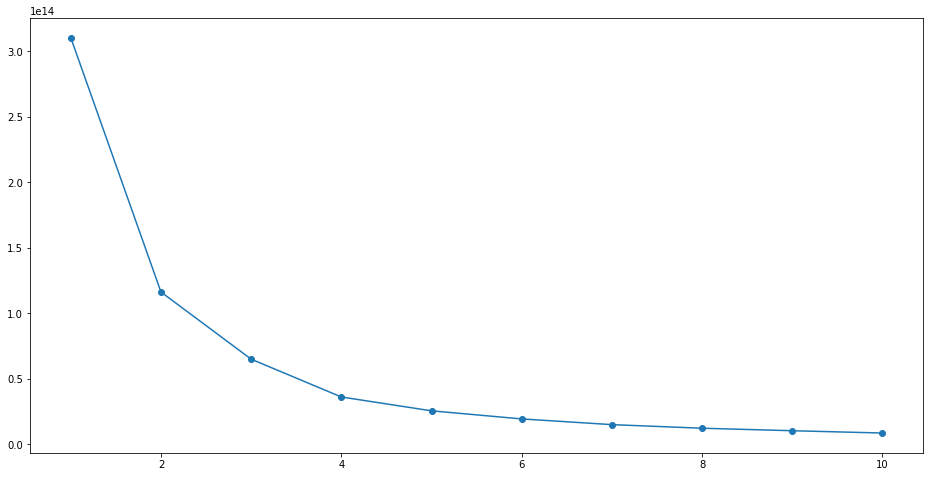

In [60]:
inertias = []

for k in range(10):
    model = KMeans(n_clusters=k+1)
    model.fit(test_set.iloc[:,1:])
    inertias.append(model.inertia_)
    
plt.plot(range(1,11), inertias, '-o')
    

In [63]:
data[['beerO', 'beerFoodO']].corr()

beerO  beerFoodO
beerO      1.000000   0.990962
beerFoodO  0.990962   1.000000

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of beverage')

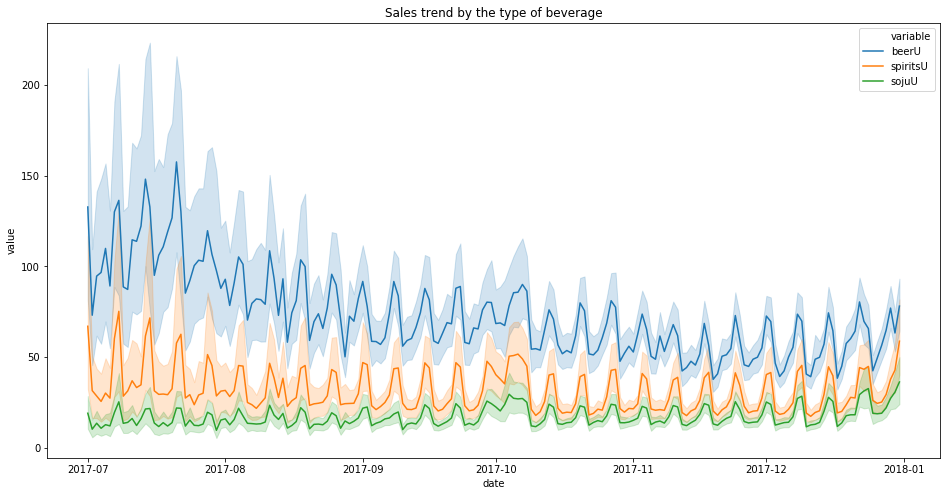

In [64]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of beverage")

In [66]:
data['bevR'] = data.beerR + data.spiritsR + data.wineR

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of order')

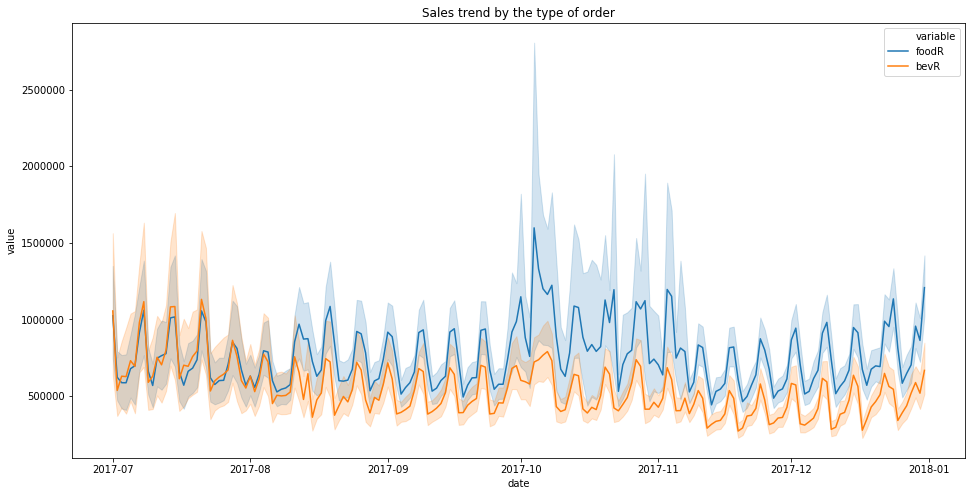

In [67]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['foodR', 'bevR'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of order")

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales trend by the type of order')

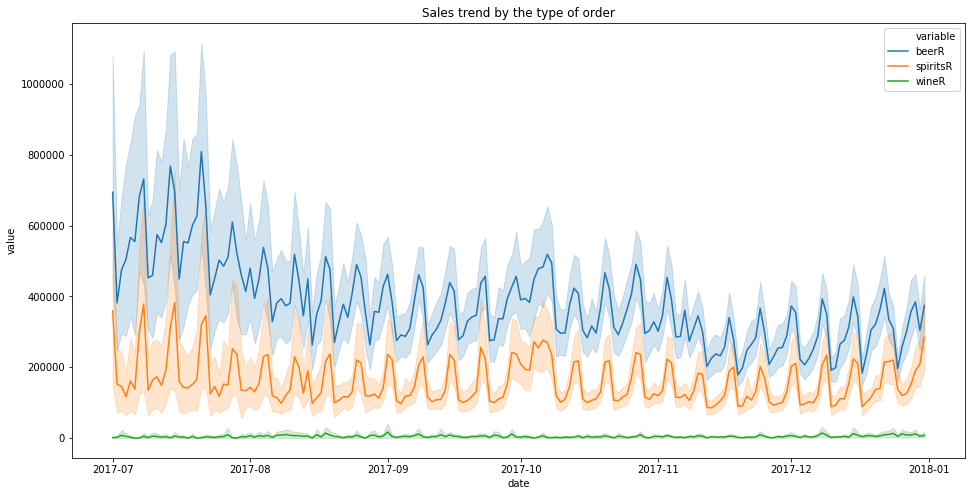

In [68]:
sns.lineplot(data=dataLong[dataLong['variable'].isin(['beerR', 'spiritsR', 'wineR'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of order")

C:\Programming\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


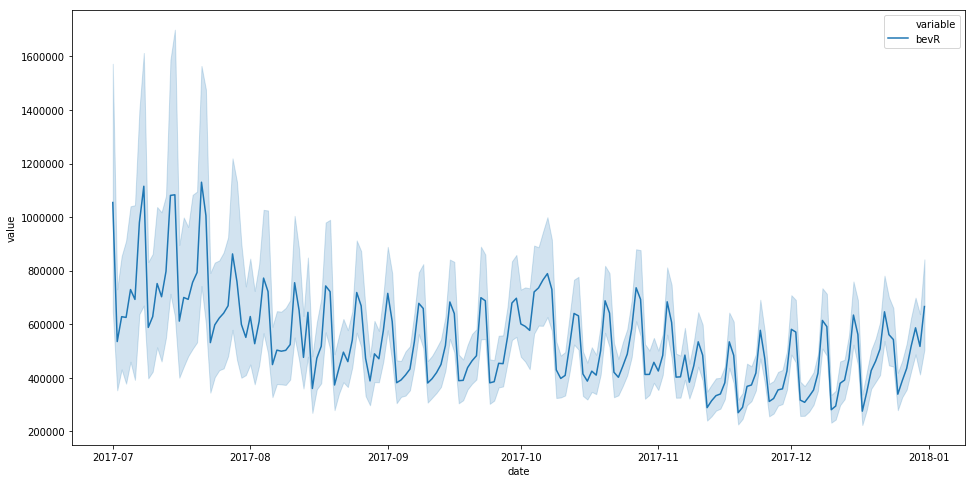

In [70]:
sns.lineplot(data=dataLong[dataLong['variable'].isin(['bevR'])], x = 'date', y='value', hue='variable')

In [11]:
a = data.groupby('date')['barId'].count()
a[a<30]

date
2017-07-01    25
2017-07-02    24
2017-07-03    26
2017-07-04    27
2017-07-05    27
2017-07-06    27
2017-07-07    27
2017-07-08    25
2017-07-09    23
2017-07-10    25
2017-07-11    26
2017-07-12    27
2017-07-13    26
2017-07-14    28
2017-07-15    25
2017-07-16    24
2017-07-17    24
2017-07-18    26
2017-07-19    28
2017-07-20    27
2017-07-21    28
2017-07-22    27
2017-07-23    25
2017-07-24    26
2017-07-30    28
Name: barId, dtype: int64

In [15]:
b = data[data.date=='2017-07-01'].barId.unique()
b

array(['Bar 1', 'Bar 2', 'Bar 3', 'Bar 5', 'Bar 6', 'Bar 7', 'Bar 8',
       'Bar 9', 'Bar 10', 'Bar 11', 'Bar 12', 'Bar 13', 'Bar 14',
       'Bar 15', 'Bar 16', 'Bar 17', 'Bar 18', 'Bar 19', 'Bar 22',
       'Bar 23', 'Bar 29', 'Bar 32', 'Bar 34', 'Bar 35', 'Bar 36'],
      dtype=object)

In [22]:
d = data[data.barId.isin(b)].melt(['barId', 'date'])
d[d['variable']=='beerU']

barId       date variable value
26004   Bar 1 2017-07-01    beerU    22
26005   Bar 1 2017-07-02    beerU    16
26006   Bar 1 2017-07-03    beerU    12
26007   Bar 1 2017-07-04    beerU    26
26008   Bar 1 2017-07-05    beerU    17
26009   Bar 1 2017-07-06    beerU    36
26010   Bar 1 2017-07-07    beerU    49
26011   Bar 1 2017-07-08    beerU    20
26012   Bar 1 2017-07-11    beerU    24
26013   Bar 1 2017-07-12    beerU     8
26014   Bar 1 2017-07-13    beerU    37
26015   Bar 1 2017-07-14    beerU    29
26016   Bar 1 2017-07-15    beerU    29
26017   Bar 1 2017-07-16    beerU    11
26018   Bar 1 2017-07-17    beerU     3
26019   Bar 1 2017-07-18    beerU    34
26020   Bar 1 2017-07-19    beerU     8
26021   Bar 1 2017-07-20    beerU    17
26022   Bar 1 2017-07-21    beerU    29
26023   Bar 1 2017-07-22    beerU    19
26024   Bar 1 2017-07-23    beerU    15
26025   Bar 1 2017-07-24    beerU     9
26026   Bar 1 2017-07-25    beerU    12
26027   Bar 1 2017-07-26    beerU    54
26028   Bar 1 2017-07-27    beerU    41
26029   Bar 1 2017-07-28    beerU    58
26030   Bar 1 2017-07-29    beerU    39
26031   Bar 1 2017-07-31    beerU    11
26032   Bar 1 2017-08-01    beerU    19
26033   Bar 1 2017-08-02    beerU     9
...       ...        ...      ...   ...
30308  Bar 36 2017-12-02    beerU    84
30309  Bar 36 2017-12-03    beerU    36
30310  Bar 36 2017-12-04    beerU    82
30311  Bar 36 2017-12-05    beerU    95
30312  Bar 36 2017-12-06    beerU   122
30313  Bar 36 2017-12-07    beerU   107
30314  Bar 36 2017-12-08    beerU   145
30315  Bar 36 2017-12-09    beerU    69
30316  Bar 36 2017-12-10    beerU    75
30317  Bar 36 2017-12-11    beerU    57
30318  Bar 36 2017-12-12    beerU   112
30319  Bar 36 2017-12-13    beerU   187
30320  Bar 36 2017-12-14    beerU   159
30321  Bar 36 2017-12-15    beerU   120
30322  Bar 36 2017-12-16    beerU    53
30323  Bar 36 2017-12-17    beerU    34
30324  Bar 36 2017-12-18    beerU    84
30325  Bar 36 2017-12-19    beerU    89
30326  Bar 36 2017-12-20    beerU   140
30327  Bar 36 2017-12-21    beerU   239
30328  Bar 36 2017-12-22    beerU    92
30329  Bar 36 2017-12-23    beerU    13
30330  Bar 36 2017-12-24    beerU    58
30331  Bar 36 2017-12-25    beerU    18
30332  Bar 36 2017-12-26    beerU    83
30333  Bar 36 2017-12-27    beerU    70
30334  Bar 36 2017-12-28    beerU   144
30335  Bar 36 2017-12-29    beerU    84
30336  Bar 36 2017-12-30    beerU    89
30337  Bar 36 2017-12-31    beerU    56

[4334 rows x 4 columns]

In [27]:
data.groupby('date', as_index=False)['barId'].count().sort_values('barId', ascending=False).head()

date  barId
179 2017-12-27    146
172 2017-12-20    145
173 2017-12-21    143
180 2017-12-28    143
171 2017-12-19    143